<a href="https://colab.research.google.com/github/girissshhh/aiml-2311cs020553/blob/main/AD_Traffic_Accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb

df = pd.read_csv('TrafficAccidents.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'TrafficAccidents.csv'

In [ ]:
print("Dataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())
print("\nColumns in dataset:", df.columns)

In [ ]:
print(df.isnull().sum())


accident_df_cleaned = df.dropna(subset=["LSOA_of_Accident_Location", "Accident_Severity"])


accident_df_cleaned["Weather_Conditions"].fillna("Unknown", inplace=True)
accident_df_cleaned["Road_Surface_Conditions"].fillna("Unknown", inplace=True)

Accident_Index                                   0
Location_Easting_OSGR                            0
Location_Northing_OSGR                           0
Longitude                                        0
Latitude                                         0
Police_Force                                     0
Accident_Severity                                0
Number_of_Vehicles                               0
Number_of_Casualties                             0
Date                                             0
Day_of_Week                                      0
Time                                             0
Local_Authority_District                         0
Local_Authority_Highway                          0
1st_Road_Class                                   0
1st_Road_Number                                  0
Road_Type                                        0
Speed_limit                                      0
Junction_Detail                                  0
Junction_Control               

<ipython-input-15-6c330dab1a88>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  accident_df_cleaned["Weather_Conditions"].fillna("Unknown", inplace=True)
<ipython-input-15-6c330dab1a88>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accident_df_cleaned["Weather_Conditions"].fillna("Unknown", inplace=True)
<ipython-input-15-6c330dab1a88>:8: 

In [ ]:
accident_df_cleaned["Hour"] = pd.to_datetime(accident_df_cleaned["Time"], errors="coerce").dt.hour


accident_df_cleaned["Day_of_Week"] = pd.to_datetime(accident_df_cleaned["Time"], errors="coerce").dt.dayofweek


severity_mapping = {1: "Fatal", 2: "Serious", 3: "Slight"}
accident_df_cleaned["Accident_Severity_Label"] = accident_df_cleaned["Accident_Severity"].map(severity_mapping)


<ipython-input-16-6c7c784549b4>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  accident_df_cleaned["Hour"] = pd.to_datetime(accident_df_cleaned["Time"], errors="coerce").dt.hour
<ipython-input-16-6c7c784549b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accident_df_cleaned["Hour"] = pd.to_datetime(accident_df_cleaned["Time"], errors="coerce").dt.hour
<ipython-input-16-6c7c784549b4>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  accident_df_cleaned["Day_of_Week"] 

In [ ]:
le = LabelEncoder()
accident_df_cleaned["Severity_Encoded"] = le.fit_transform(accident_df_cleaned["Accident_Severity_Label"])

features = ["Weather_Conditions", "Road_Surface_Conditions", "Speed_limit", "Hour", "Day_of_Week"]
X = accident_df_cleaned[features]
y = accident_df_cleaned["Severity_Encoded"]


X_encoded = pd.get_dummies(X, drop_first=True)

<ipython-input-17-f69a3b3edd95>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accident_df_cleaned["Severity_Encoded"] = le.fit_transform(accident_df_cleaned["Accident_Severity_Label"])


<ipython-input-18-08e8f78501c0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=accident_df_cleaned, x="Accident_Severity_Label", palette="rocket")


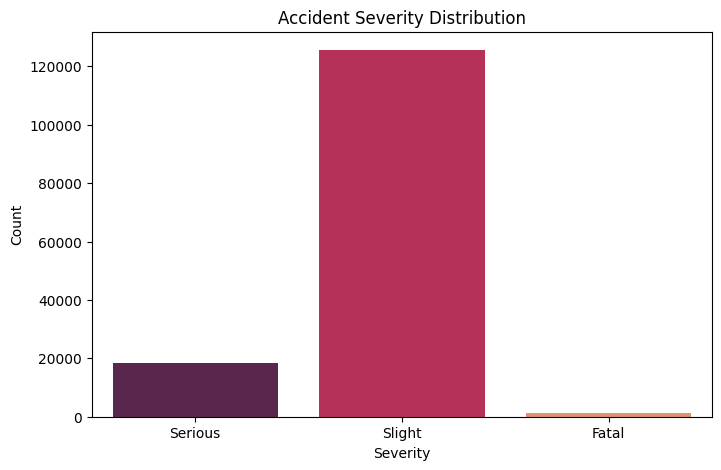

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=accident_df_cleaned, x="Accident_Severity_Label", palette="rocket")
plt.title("Accident Severity Distribution")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.show()

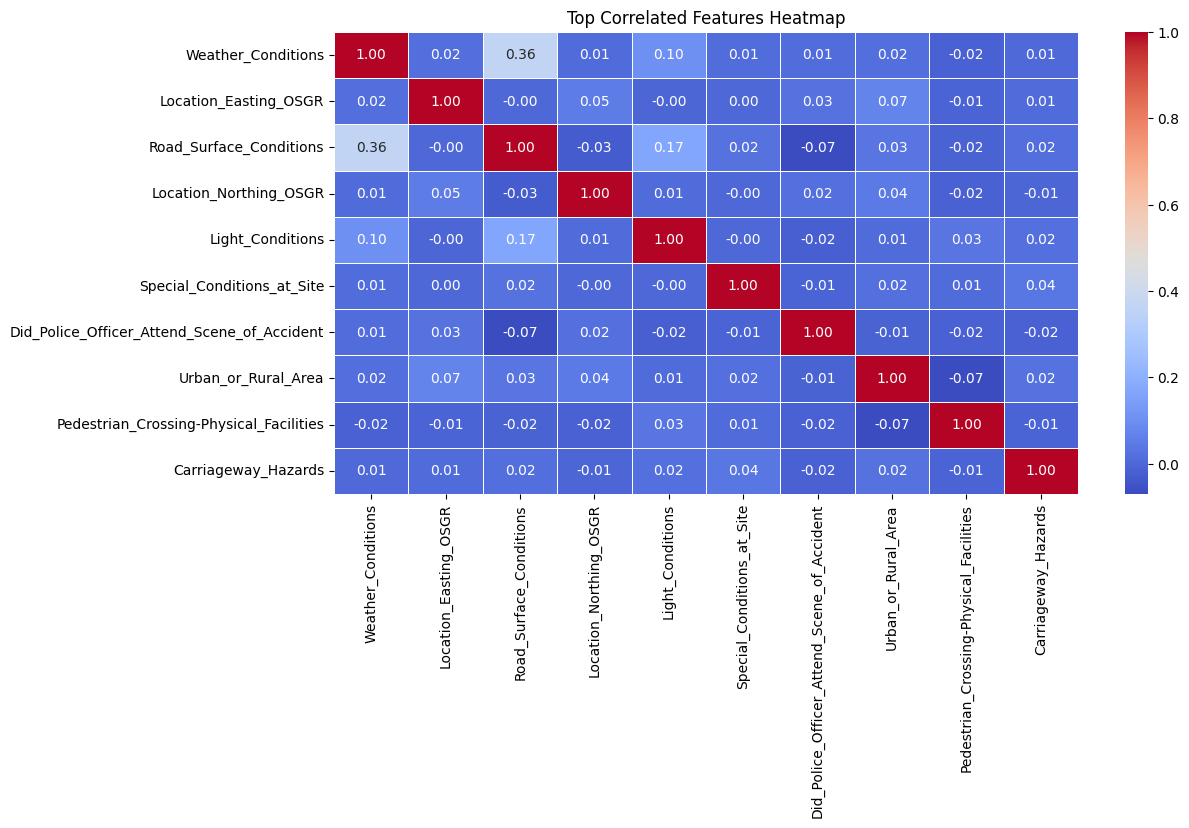

In [ ]:
# Heatmap
numeric_df = df.select_dtypes(include=[np.number])
top_corr_features = numeric_df.corr().abs().unstack().sort_values(ascending=False)
top_features = list(set(top_corr_features.index.get_level_values(0)[:10]))
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df[top_features].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Top Correlated Features Heatmap")
plt.show()

<Figure size 1000x500 with 0 Axes>

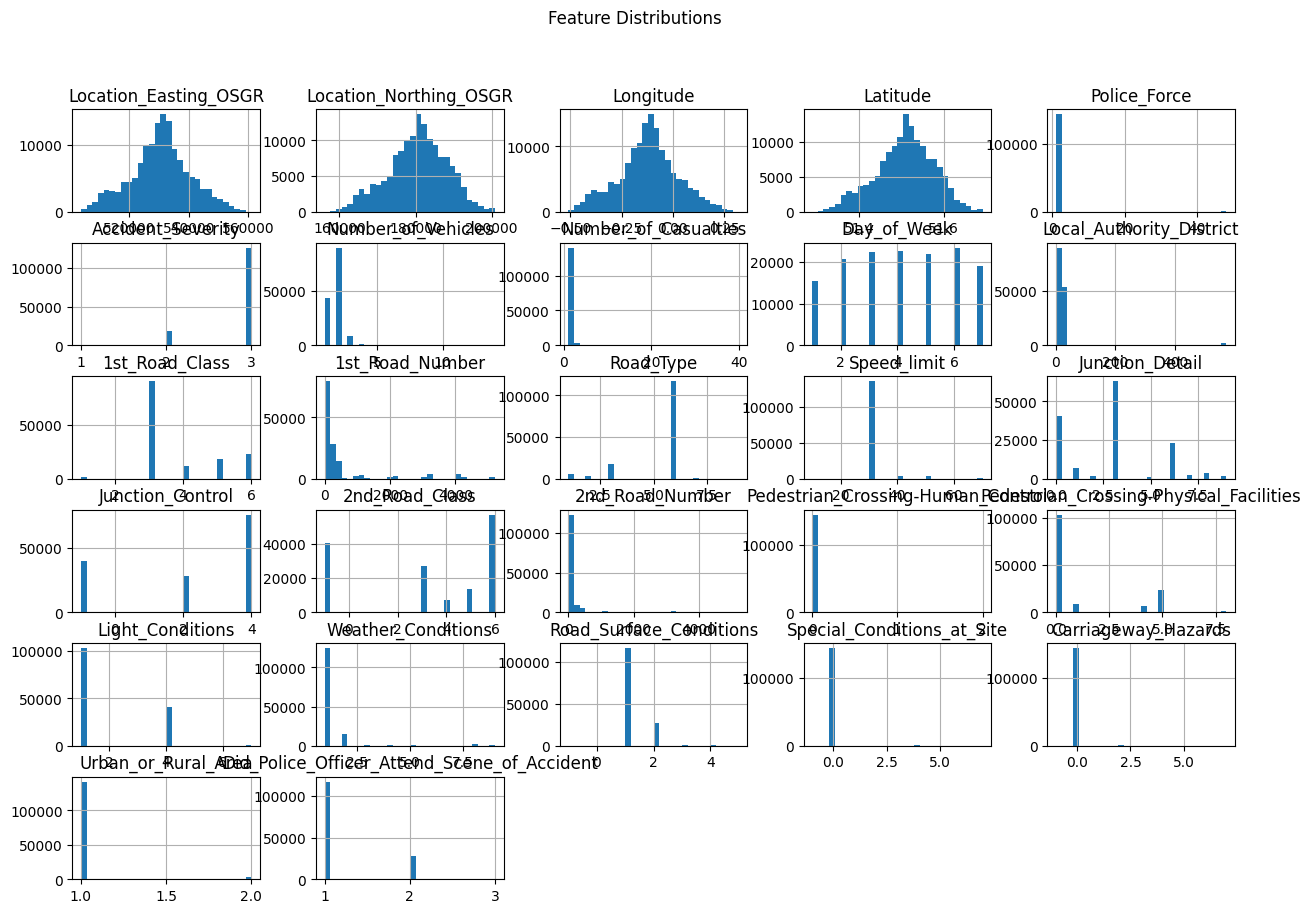

In [ ]:
# EDA
plt.figure(figsize=(10, 5))
df.hist(figsize=(15, 10), bins=30)
plt.suptitle("Feature Distributions")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Decision Tree Accuracy: 0.6382971389176146

Decision Tree Classifier Report:
              precision    recall  f1-score   support

       Fatal       0.02      0.43      0.03       246
     Serious       0.15      0.10      0.12      3663
      Slight       0.88      0.72      0.79     25101

    accuracy                           0.64     29010
   macro avg       0.35      0.41      0.31     29010
weighted avg       0.78      0.64      0.70     29010



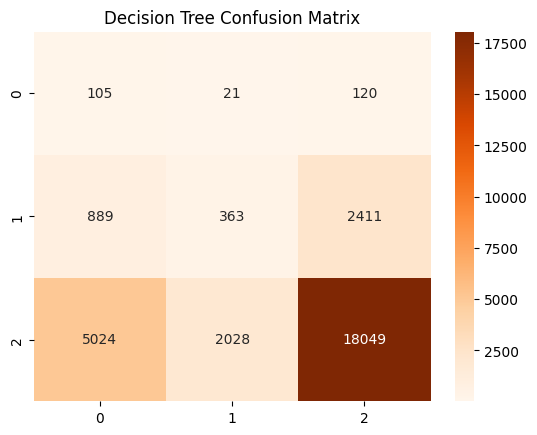

In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=6,class_weight='balanced')

# Train Decision Tree
dt_model.fit(X_train_scaled, y_train)
y_dt_pred = dt_model.predict(X_test_scaled)

dt_accuracy = accuracy_score(y_test, y_dt_pred)
print(f"Decision Tree Accuracy: {dt_accuracy}")
print("\nDecision Tree Classifier Report:")
print(classification_report(y_test, y_dt_pred, target_names=le.classes_))

sns.heatmap(confusion_matrix(y_test, y_dt_pred), annot=True, fmt='d', cmap='Oranges')
plt.title("Decision Tree Confusion Matrix")
plt.show()


Logistic Regression Accuracy: 0.49917269906928646
Classification Report:
               precision    recall  f1-score   support

           0       0.01      0.49      0.02       246
           1       0.12      0.11      0.11      3663
           2       0.87      0.56      0.68     25101

    accuracy                           0.50     29010
   macro avg       0.33      0.39      0.27     29010
weighted avg       0.77      0.50      0.60     29010



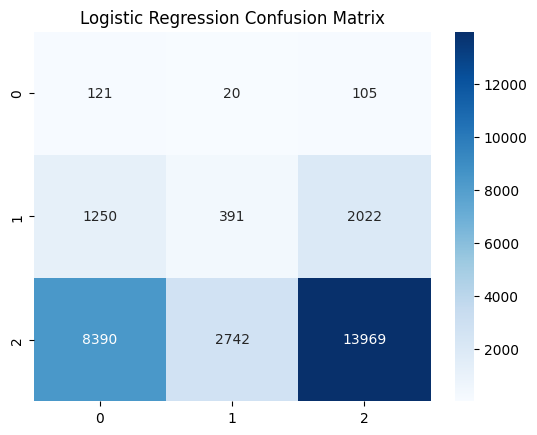

In [ ]:
### **Logistic Regression**
log_model = LogisticRegression(class_weight='balanced',max_iter=500)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()



Random Forest Accuracy: 0.8648052395725612
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       246
           1       0.12      0.00      0.00      3663
           2       0.87      1.00      0.93     25101

    accuracy                           0.86     29010
   macro avg       0.33      0.33      0.31     29010
weighted avg       0.76      0.86      0.80     29010



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


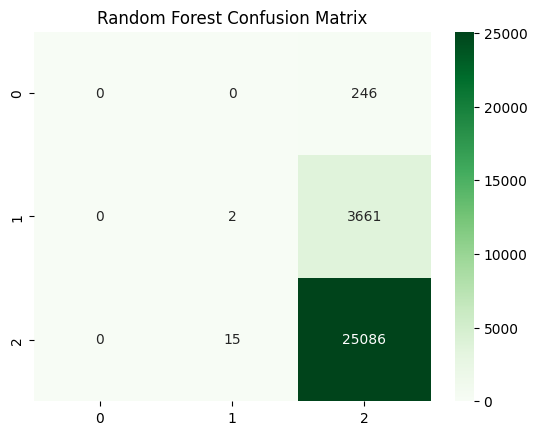

In [ ]:
### **Random Forest**
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rfc))
print("Classification Report:\n", classification_report(y_test, y_pred_rfc))
sns.heatmap(confusion_matrix(y_test, y_pred_rfc), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.show()


SVM Accuracy: 0.5635642881764908
Classification Report:
               precision    recall  f1-score   support

           0       0.01      0.40      0.02       246
           1       0.11      0.07      0.09      3663
           2       0.87      0.64      0.73     25101

    accuracy                           0.56     29010
   macro avg       0.33      0.37      0.28     29010
weighted avg       0.76      0.56      0.65     29010



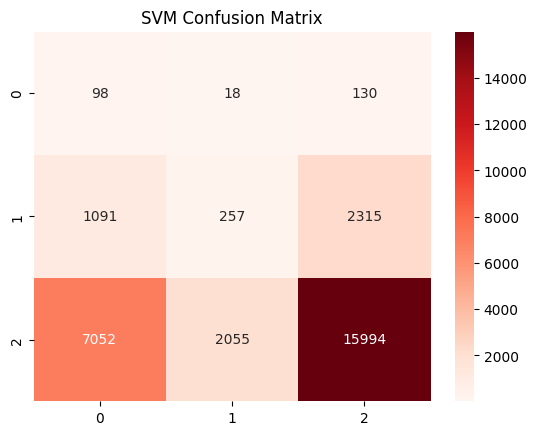

In [ ]:
### **Support Vector Machine (SVM)**
svm_model = SVC(class_weight='balanced',kernel='linear')
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

print("\nSVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Reds')
plt.title("SVM Confusion Matrix")
plt.show()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:15:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Accuracy: 0.8649086521889003
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       246
           1       0.07      0.00      0.00      3663
           2       0.87      1.00      0.93     25101

    accuracy                           0.86     29010
   macro avg       0.31      0.33      0.31     29010
weighted avg       0.76      0.86      0.80     29010



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


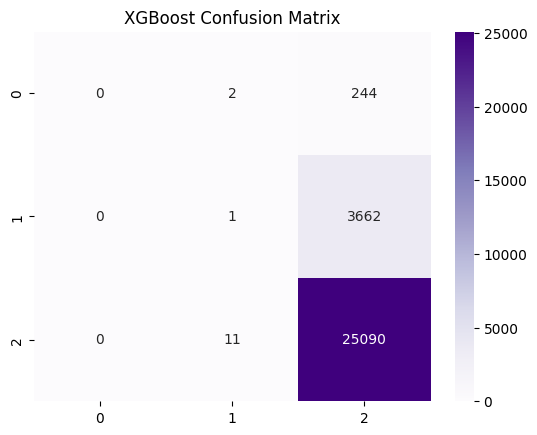

In [ ]:
### **XGBoost**
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss',class_weight='balanced')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("\nXGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Purples')
plt.title("XGBoost Confusion Matrix")
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006503 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 49
[LightGBM] [Info] Number of data points in the train set: 116039, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612

LightGBM Accuracy: 0.615511892450879
Classification Report:
               precision    recall  f1-score   support

           0       0.02      0.39      0.03       246
           1       0.13      0.11      0.12      3663
           2       0.88      0.69      0.77     25101

    accuracy                           0.62     29010
   macro avg       0.34      0.40      0.31     29010
weighted avg       0.78      0.62      0.68     29010



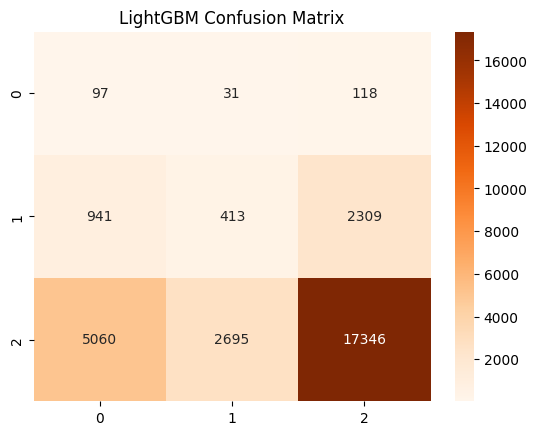

In [ ]:
### **LightGBM**
lgb_model = lgb.LGBMClassifier(class_weight='balanced')
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

print("\nLightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("Classification Report:\n", classification_report(y_test, y_pred_lgb))
sns.heatmap(confusion_matrix(y_test, y_pred_lgb), annot=True, fmt='d', cmap='Oranges')
plt.title("LightGBM Confusion Matrix")
plt.show()

In [ ]:
with open('random_forest.pkl', 'wb') as file:
    pickle.dump(rfc, file)